# [Forecasting Time-Series data with Prophet](https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/)

In [2]:
from fbprophet import Prophet
import numpy as np
import pandas as pd


In [3]:
url = "C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\example_retail_sales.csv"
sales_df = pd.read_csv(url)
print(sales_df.head())
print(sales_df.shape)

           ds       y
0  1992-01-01  146376
1  1992-02-01  147079
2  1992-03-01  159336
3  1992-04-01  163669
4  1992-05-01  170068
(293, 2)


In [4]:
sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
# for more info: https://people.duke.edu/~rnau/411log.htm
sales_df['y'] = np.log(sales_df['y'])
sales_df.head()

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


In [5]:
model = Prophet() #instantiate Prophet
model.fit(sales_df); #fit the model with your dataframe

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ivonnics\Anaconda3\envs\PROPHET\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In this line of code, we are creating a pandas dataframe with 6 (periods = 6) future data points with a monthly frequency (freq = ‘m’).  If you’re working with daily data, you wouldn’t want include freq=’m’.

Now we forecast using the ‘predict’ command:

In [7]:
sales_df.head()

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


In [8]:
forecast_data = model.predict(future_data)

In [9]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057717,13.037677,13.077526
295,2016-07-31,13.082380,13.062611,13.103803
296,2016-08-31,13.015577,12.996793,13.038925
297,2016-09-30,13.037937,13.016177,13.058870
298,2016-10-31,13.055811,13.034007,13.078004


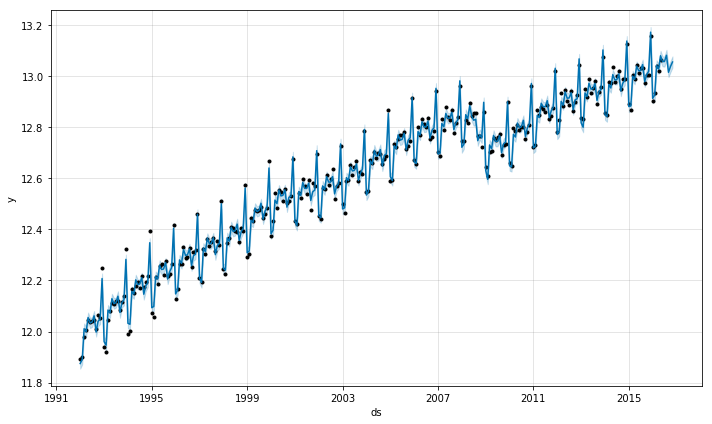

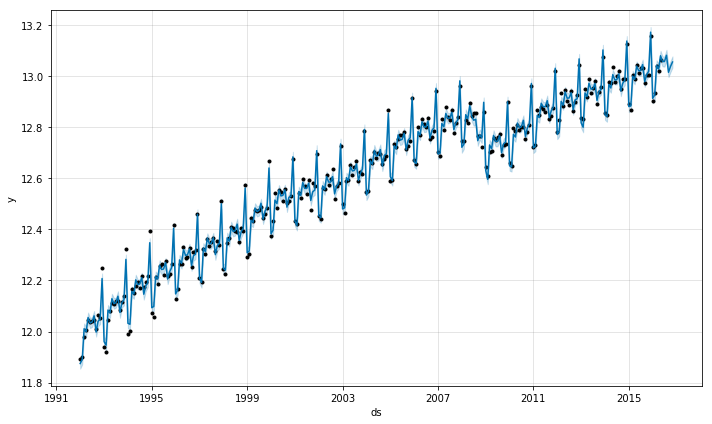

In [10]:
model.plot(forecast_data)

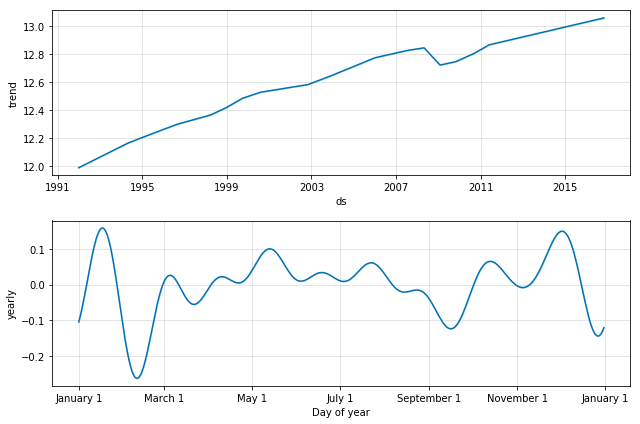

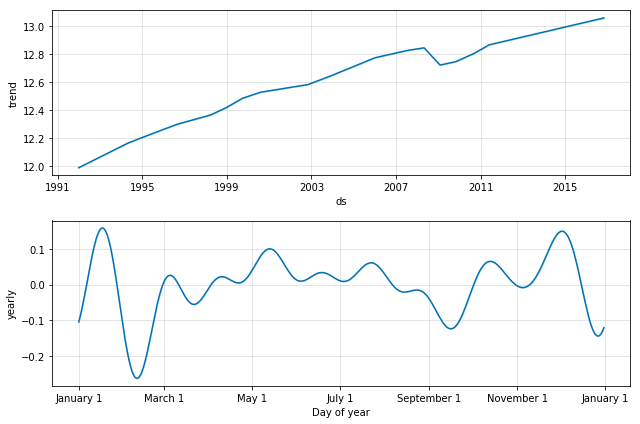

In [11]:
model.plot_components(forecast_data)

Since we are working with monthly data, Prophet will plot the trend and the yearly seasonality but if you were working with daily data, you would also see a weekly seasonality plot included.

From the trend and seasonality, we can see that the trend is a playing a large part in the underlying time series and seasonality comes into play more toward the beginning and the end of the year.

So far so good.  With the above info, we’ve been able to quickly model and forecast some data to get a feel for what might be coming our way in the future from this particular data set.

Before we go on to tweaking this model (which I’ll talk about in my next post), I wanted to share a little tip for getting your forecast plot to display your ‘original’ data so you can see the forecast in ‘context’ and in the original scale rather than the log-transformed data. You can do this by using np.exp() to get our original data back.

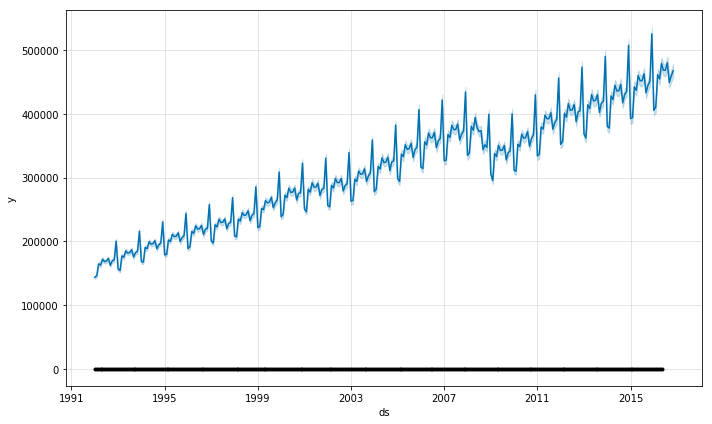

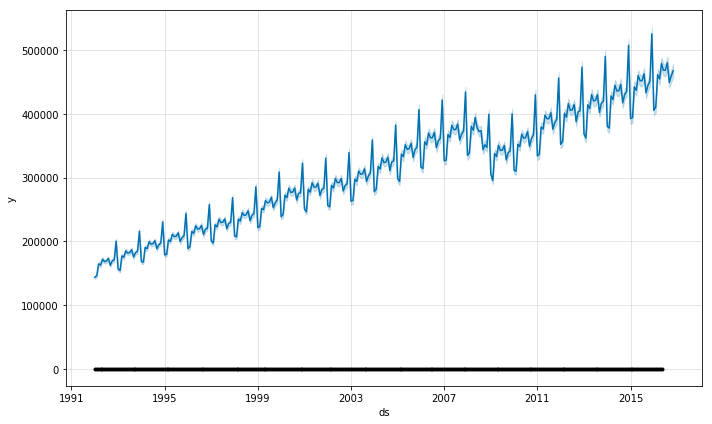

In [12]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
model.plot(forecast_data_orig)

Something looks wrong (and it is)!

Our original data is drawn on the forecast but the black dots (the dark line at the bottom of the chart) is our log-transform original ‘y’ data. For this to make any sense, we need to get our original ‘y’ data points plotted on this chart. To do this, we just need to rename our ‘y_orig’ column in the sales_df dataframe to ‘y’ to have the right data plotted. Be careful here…you want to make sure you don’t continue analyzing data with the non-log-transformed data.

In [13]:
sales_df.head()

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


In [17]:
sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
#sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'
sales_df.head()

,ds,y,y_orig,y_log
0,1992-01-01,146376,146376,146376
1,1992-02-01,147079,147079,147079
2,1992-03-01,159336,159336,159336
3,1992-04-01,163669,163669,163669
4,1992-05-01,170068,170068,170068


In [18]:
sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'
sales_df.head()

,ds,y,y_orig,y_log
0,1992-01-01,146376,146376,146376
1,1992-02-01,147079,147079,147079
2,1992-03-01,159336,159336,159336
3,1992-04-01,163669,163669,163669
4,1992-05-01,170068,170068,170068


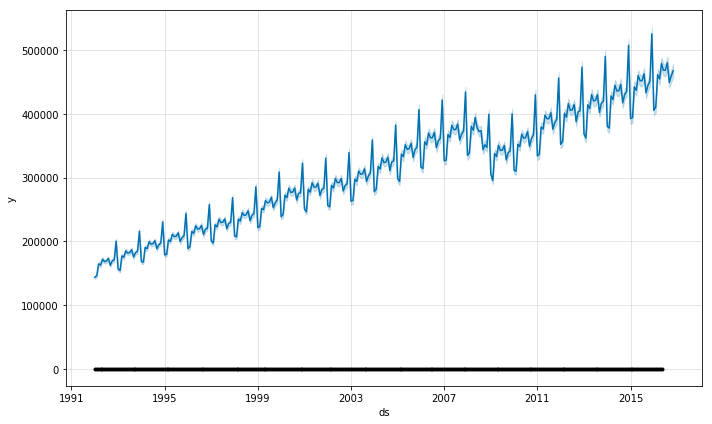

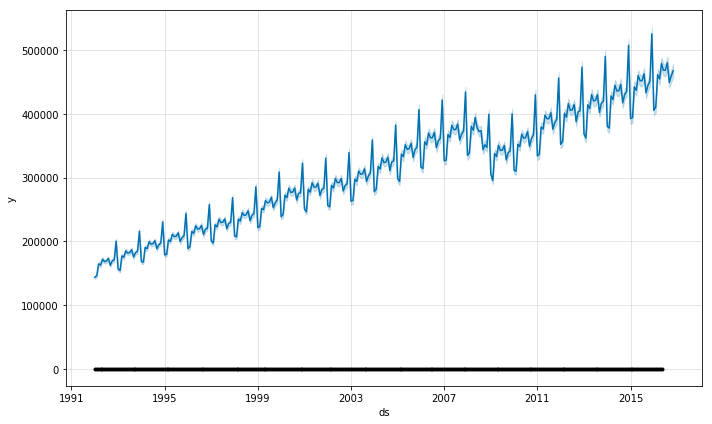

In [19]:
model.plot(forecast_data_orig)

There we go…a forecast for retail sales 6 months into the future (you have to look closely at the very far right-hand side for the forecast). It looks like the next six months will see sales between 450K and 475K.

Please [check](https://github.com/urgedata/pythondata/blob/master/fbprophet/fbprophet_part_one.ipynb)
## 2nd part

In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline #only needed for jupyter
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: #only needed for jupyter


In [7]:
url = "C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\sales2.csv"
sales_df = pd.read_csv(url)
sales_df['y_orig']=sales_df.y # We want to save the original data for later use
sales_df['y'] = np.log(sales_df['y']) #take the log of the data to remove trends, etc
 
model = Prophet()
model.fit(sales_df);
 
#create 12 months of future data
future_data = model.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = model.predict(future_data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
sales_df.iloc[79:84]

,ds,y,y_orig
79,1998-08-01,12.390317,240462
80,1998-09-01,12.351224,231243
81,1998-10-01,12.405882,244234
82,1998-11-01,12.392515,240991
83,1998-12-01,12.574075,288969


In [9]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
300,2016-12-31,12.945672,12.923484,12.969625
301,2017-01-31,12.968281,12.944920,12.993065
302,2017-02-28,13.065982,13.040841,13.090740
303,2017-03-31,13.055274,13.029811,13.084655
304,2017-04-30,13.107375,13.080212,13.135862


In [12]:
forecast_data.iloc[79:84][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
79,1998-08-01,12.420857,12.401097,12.440046
80,1998-09-01,12.357102,12.338516,12.378141
81,1998-10-01,12.390757,12.370575,12.411001
82,1998-11-01,12.404935,12.386263,12.424964
83,1998-12-01,12.561996,12.542817,12.580658


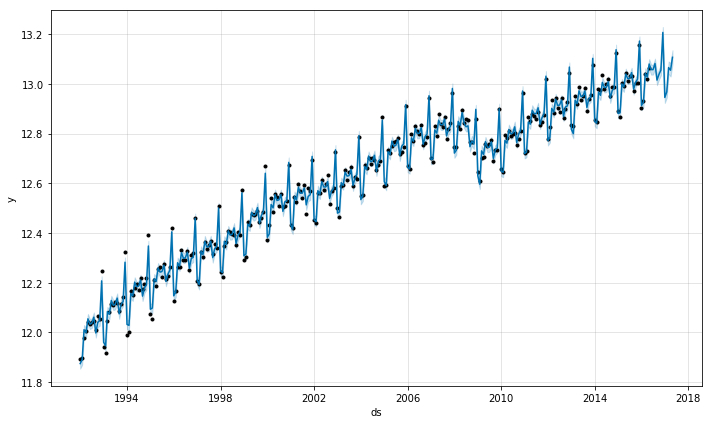

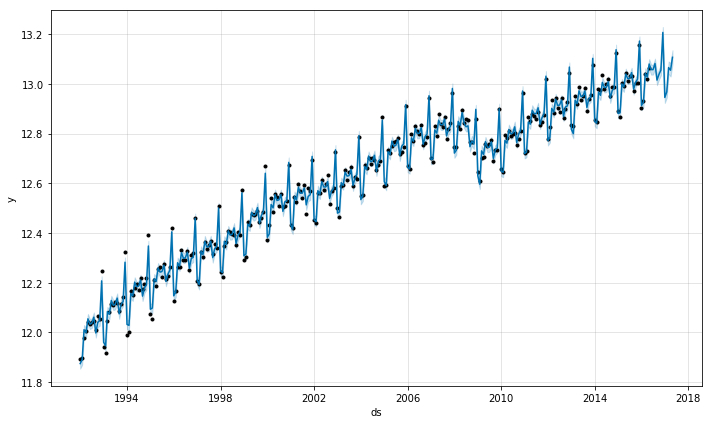

In [13]:
model.plot(forecast_data)

In [28]:
#sales_df.set_index('ds', inplace=True)
#forecast_data.set_index('ds', inplace=True)
viz_df = sales_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
del viz_df['y']
#del viz_df['index']
print(viz_df.head())
print(sales_df.head())

              y_orig       yhat  yhat_lower  yhat_upper
ds                                                     
1992-01-01  146376.0  11.874750   11.854111   11.894873
1992-02-01  147079.0  11.890914   11.869963   11.911455
1992-03-01  159336.0  12.011007   11.991851   12.030179
1992-04-01  163669.0  11.999265   11.978631   12.019002
1992-05-01  170068.0  12.054946   12.034979   12.074725
                    y  y_orig
ds                           
1992-01-01  11.893934  146376
1992-02-01  11.898725  147079
1992-03-01  11.978770  159336
1992-04-01  12.005601  163669
1992-05-01  12.043954  170068


In [29]:
viz_df.tail()

,y_orig,yhat,yhat_lower,yhat_upper
ds,,,,
2016-12-31,NaN,12.945672,12.923484,12.969625
2017-01-31,NaN,12.968281,12.944920,12.993065
2017-02-28,NaN,13.065982,13.040841,13.090740
2017-03-31,NaN,13.055274,13.029811,13.084655
2017-04-30,NaN,13.107375,13.080212,13.135862


In [30]:
sales_df.index = pd.to_datetime(sales_df.index)
last_date = sales_df.index[-1]

In [31]:
import matplotlib.pyplot as plt
from datetime import date,timedelta
 
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
# Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(sales_df.y_orig)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
  
# change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot